# Stock Market Data practice

## Intro 
**Aims:** import, read and visualise stock market data. <br> 
**Data source:** I will use pandas datareader, which gives me access to different financial data files. The advantage of using pandas-datareader is that it gets the data into pandas dataframe structure for me. <br>
**Tools:** I will use pandas to manipulate the data, datatime since we want to specify a data range and, as mentioned above, pandas datareader.

EDIT: panda-datareader install error so I used yfinance specifically instead

## Getting stock market data

In [12]:
#conda install -c https://conda.anaconda.org/anaconda pandas-datareader
!pip install yfinance

     |████████████████████████████████| 50 kB 2.2 MB/s eta 0:00:011
     |████████████████████████████████| 4.8 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 499 kB 6.5 MB/s eta 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [13]:
import datetime as dt
import pandas as pd
import yfinance as yf

In [14]:
#need to specify date range for the data to look at
#timedelta method expresses difference between dates, could specify start date using datetime()
#datetime() gives year,month,day,hour,minute,second,microsecond
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=500)
start_date, end_date

(datetime.datetime(2021, 8, 9, 12, 54, 7, 337052),
 datetime.datetime(2022, 12, 22, 12, 54, 7, 337052))

In [15]:
#selecting stocks to look at, .L for LSE
stocklist = ['BP.L', 'SHEL.L', 'CNA.L']
stocklist

['BP.L', 'SHEL.L', 'CNA.L']

In [17]:
#getting data
df = yf.download(stocklist, start_date, end_date)
df.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                               Close             \
                  BP.L      CNA.L       SHEL.L        BP.L      CNA.L   
Date                                                                    
2021-08-09  285.352081  48.582066  1386.682983  305.450012  49.270000   
2021-08-10  288.575104  48.601788  1393.283569  308.899994  49.290001   
2021-08-11  291.190887  49.124386  1405.730469  311.700012  49.820000   
2021-08-12  290.436676  49.163826  1402.467407  306.950012  49.860001   
2021-08-13  288.922699  49.232849  1392.545288  305.350006  49.930000   

                               High                                 Low  \
                 SHEL.L        BP.L      CNA.L       SHEL.L        BP.L   
Date                                                                      
2021-08-09  1470.599976  306.399994  49.779999  1478.400024  300.000000   
2021-08-10  1477.599976  310.117004  49.950001  1482.599976  302.350006   
2021-08-11  1490.800049  312.700012  50.029999  1493.599976  308.000000   
2021-08-12  1470.000000  311.049988  50.680000  1484.000000  305.799988   
2021-08-13  1459.599976  308.500000  50.119999  1468.599976  303.886993   

                                          Open                          \
                CNA.L       SHEL.L        BP.L      CNA.L       SHEL.L   
Date                                                                     
2021-08-09  48.154999  1454.000000  305.649994  48.189999  1473.400024   
2021-08-10  48.930000  1461.199951  305.200012  49.950001  1470.800049   
2021-08-11  49.238998  1480.599976  310.500000  49.860001  1487.199951   
2021-08-12  49.490002  1462.800049  309.299988  49.490002  1474.000000   
2021-08-13  49.560001  1452.479980  306.299988  49.959999  1464.000000   

                Volume                        
                  BP.L     CNA.L      SHEL.L  
Date                                          
2021-08-09  37437060.0  15271673  12975421.0  
2021-08-10  41907557.0   8452469   4272139.0  
2021-08-11  27870340.0  12044026  12156809.0  
2021-08-12  51710456.0  12043096   2791875.0  
2021-08-13  80590108.0   8592243  28294166.0

In [21]:
#now I would like to understand the structure of the data
df.dtypes

Adj Close  BP.L      float64
           CNA.L     float64
           SHEL.L    float64
Close      BP.L      float64
           CNA.L     float64
           SHEL.L    float64
High       BP.L      float64
           CNA.L     float64
           SHEL.L    float64
Low        BP.L      float64
           CNA.L     float64
           SHEL.L    float64
Open       BP.L      float64
           CNA.L     float64
           SHEL.L    float64
Volume     BP.L      float64
           CNA.L       int64
           SHEL.L    float64
dtype: object

In [22]:
#how the data is indexed, we expect this to be by dates since we specified a date range
df.index

DatetimeIndex(['2021-08-09', '2021-08-10', '2021-08-11', '2021-08-12',
               '2021-08-13', '2021-08-16', '2021-08-17', '2021-08-18',
               '2021-08-19', '2021-08-20',
               ...
               '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22'],
              dtype='datetime64[ns]', name='Date', length=348, freq=None)

In [23]:
#tells us that the data is selectable on two names - the symbols and then the attribute type
df.columns

MultiIndex([('Adj Close',   'BP.L'),
            ('Adj Close',  'CNA.L'),
            ('Adj Close', 'SHEL.L'),
            (    'Close',   'BP.L'),
            (    'Close',  'CNA.L'),
            (    'Close', 'SHEL.L'),
            (     'High',   'BP.L'),
            (     'High',  'CNA.L'),
            (     'High', 'SHEL.L'),
            (      'Low',   'BP.L'),
            (      'Low',  'CNA.L'),
            (      'Low', 'SHEL.L'),
            (     'Open',   'BP.L'),
            (     'Open',  'CNA.L'),
            (     'Open', 'SHEL.L'),
            (   'Volume',   'BP.L'),
            (   'Volume',  'CNA.L'),
            (   'Volume', 'SHEL.L')],
           )

In [35]:
#statistical summary of data
df.describe()

Adj Close                                Close              \
             BP.L       CNA.L       SHEL.L        BP.L       CNA.L   
count  343.000000  348.000000   347.000000  343.000000  348.000000   
mean   382.722042   73.198841  1958.990941  393.566475   74.045385   
std     59.114705   12.280431   328.311255   54.274337   12.282214   
min    272.269562    0.750374  1320.990845  287.750000    0.761000   
25%    335.878006   66.552597  1637.777405  351.524994   67.450003   
50%    377.016266   75.727676  2006.275513  389.149994   76.640003   
75%    433.967896   80.795906  2269.950684  440.825012   81.940002   
max    497.500000   95.879997  2504.653564  501.799988   95.879997   

                          High                                  Low  \
            SHEL.L        BP.L       CNA.L       SHEL.L        BP.L   
count   347.000000  343.000000  348.000000   347.000000  343.000000   
mean   2005.334580  398.962058   75.192098  2030.690830  388.314615   
std     310.506394   54.998548   12.549161   316.226771   53.610130   
min    1384.599976  289.350006    0.794350  1399.000000  286.100006   
25%    1704.700012  356.224991   67.919998  1723.000000  346.225006   
50%    2061.500000  394.600006   78.170002  2092.500000  383.592010   
75%    2291.250000  446.099991   83.185003  2322.265503  431.675003   
max    2526.500000  504.399994   97.080002  2557.000000  494.450012   

                                      Open                           \
            CNA.L       SHEL.L        BP.L       CNA.L       SHEL.L   
count  348.000000   347.000000  343.000000  348.000000   347.000000   
mean    72.873859  1977.810334  393.034259   73.980309  2001.573200   
std     12.051019   307.374806   54.277324   12.338856   310.960390   
min      0.756000  1282.780029  287.649994    0.787400  1392.400024   
25%     66.580002  1681.099976  350.625000   67.560001  1693.400024   
50%     75.420002  2024.000000  389.250000   76.829998  2060.000000   
75%     80.404001  2258.500000  437.825012   81.940002  2291.500000   
max     95.440002  2488.500000  497.600006   96.120003  2502.500000   

             Volume                              
               BP.L         CNA.L        SHEL.L  
count  3.430000e+02  3.480000e+02  3.470000e+02  
mean   5.759042e+07  2.802029e+07  2.143936e+07  
std    2.941878e+07  1.893184e+07  1.211777e+07  
min    7.289525e+06  1.073989e+06  1.045330e+06  
25%    3.908827e+07  1.661610e+07  1.313999e+07  
50%    5.061718e+07  2.296606e+07  1.833433e+07  
75%    7.034137e+07  3.348909e+07  2.824894e+07  
max    2.574570e+08  1.623792e+08  7.857165e+07

In [33]:
#notice from above that the centrica volume data is of integer type while the other are in float
df['Volume'] = df['Volume'].astype('float')
df['Volume'].head()

,BP.L,CNA.L,SHEL.L
Date,,,
2021-08-09,37437060.0,15271673.0,12975421.0
2021-08-10,41907557.0,8452469.0,4272139.0
2021-08-11,27870340.0,12044026.0,12156809.0
2021-08-12,51710456.0,12043096.0,2791875.0
2021-08-13,80590108.0,8592243.0,28294166.0


In [36]:
#looking at specific attributes, can change percentiles by describe(percentiles=[0.1,0.5,0.9]) for example
df['Close'].describe()

,BP.L,CNA.L,SHEL.L
count,343.000000,348.000000,347.000000
mean,393.566475,74.045385,2005.334580
std,54.274337,12.282214,310.506394
min,287.750000,0.761000,1384.599976
25%,351.524994,67.450003,1704.700012
50%,389.149994,76.640003,2061.500000
75%,440.825012,81.940002,2291.250000
max,501.799988,95.879997,2526.500000


In [39]:
#subsection data (eg finding stats for last 50 days)
df['Close'][df['Close'].index > end_date - dt.timedelta(days=50)].describe()

,BP.L,CNA.L,SHEL.L
count,36.000000,36.000000,36.000000
mean,478.341666,90.253333,2359.208333
std,11.764957,6.091607,63.262421
min,455.399994,76.620003,2243.000000
25%,469.024994,86.805002,2313.625000
50%,480.250000,92.419998,2359.250000
75%,484.312508,94.745001,2382.125000
max,501.799988,95.879997,2526.500000


Notice that the count doesn't match the number of days that we specified. This is becasue that is only data for trading days so count=36 takes into account holidays etc.

## Plotting

<AxesSubplot:xlabel='Date', ylabel='Close price'>

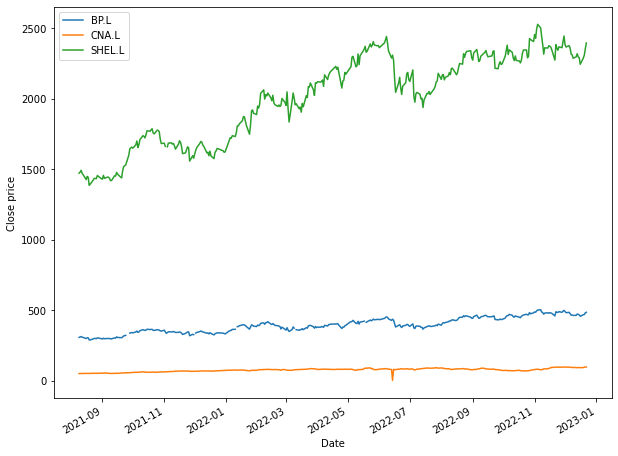

In [43]:
#pandas dataframe is quick to plot
df['Close'].plot(figsize=(10,8), xlabel='Date', ylabel='Close price')

Matplotlib is good to get visualisation quickly but not so good for interaction. Could use plotly. Documentation https://plotly.com/python/

In [51]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
#changing from matplotlib to plotly
pd.options.plotting.backend = 'plotly'

In [52]:
df['Close'].plot()

In [54]:
#histogram for shell percentage change in close prices. Shows distribution of how close price has changed
df['Close']['SHEL.L'].pct_change().plot(kind='hist')